In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
covid_conf=pd.read_csv("C:/Users/user/Downloads/time_series_covid19_confirmed_global.csv")
covid_conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,176918,176983,177039,177093,177191,177255,177321,177321,177321,177321
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272885,272961,273040,273088,273088,273146,273164,273257,273318,273387
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265511,265524,265539,265550,265562,265573,265585,265599,265612,265621
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,39234,39234,39234,39234,39234,39234,39713,39713,39713,39713
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99003,99003,99003,99003,99010,99058,99058,99081,99102,99106


In [3]:
covid_conf.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
count,282.000000,282.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,284.000000,284.000000,...,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02
mean,20.106368,21.958718,1.961268,2.313380,3.323944,5.059859,7.464789,10.31338,19.647887,21.721831,...,1.641759e+06,1.648361e+06,1.653926e+06,1.657530e+06,1.662387e+06,1.669422e+06,1.675211e+06,1.680778e+06,1.686641e+06,1.690532e+06
std,25.841453,75.893366,26.402603,26.499491,32.992032,45.919425,64.175242,86.46777,212.163754,213.470672,...,6.282430e+06,6.293385e+06,6.301160e+06,6.306199e+06,6.313993e+06,6.326220e+06,6.337015e+06,6.347337e+06,6.357948e+06,6.364187e+06
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.643279,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,8.836000e+03,9.424750e+03,9.427750e+03,9.427750e+03,9.429250e+03,9.448000e+03,9.448500e+03,9.457500e+03,9.461250e+03,9.461750e+03
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,7.468450e+04,7.617750e+04,7.632050e+04,7.642200e+04,7.654750e+04,7.671400e+04,7.690150e+04,7.771800e+04,7.874200e+04,7.891450e+04
75%,40.950592,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,7.963390e+05,7.969938e+05,7.974970e+05,7.976455e+05,8.131760e+05,8.137815e+05,8.207418e+05,8.248528e+05,8.260402e+05,8.268008e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.00000,3554.000000,3554.000000,...,7.968374e+07,7.971725e+07,7.972816e+07,7.973479e+07,7.978043e+07,7.980344e+07,7.984443e+07,7.988856e+07,7.993678e+07,7.994610e+07


In [4]:
covid_conf_last_week =covid_conf.iloc[:,-8:].columns.to_list()
last_week_by_countries =covid_conf.iloc[:,[1]+[*range(-8,0,1)]] 
last_week_by_countries.sort_values(by=covid_conf_last_week,ascending=False,inplace=True) 
last_week_by_countries.head()

<ipython-input-4-0840cf9eb7aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week_by_countries.sort_values(by=covid_conf_last_week,ascending=False,inplace=True)


,Country/Region,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
256,US,79728165,79734788,79780432,79803443,79844430,79888564,79936777,79946097
148,India,43007841,43009390,43010971,43012749,43014687,43016372,43018032,43019453
31,Brazil,29624435,29637814,29650082,29691641,29738362,29775568,29809769,29839103
131,France,23395779,23477062,23496196,23676973,23822533,23962674,24101868,24241385
273,United Kingdom,20093762,20093762,20319434,20413731,20515998,20613817,20691123,20691123


In [5]:
last_week_by_countries['Country/Region']

256                US
148             India
31             Brazil
131            France
273    United Kingdom
            ...      
88              China
185        Micronesia
42             Canada
89              China
264    United Kingdom
Name: Country/Region, Length: 284, dtype: object

In [10]:
last_ten= last_week_by_countries.head(10)


<AxesSubplot:xlabel='Country/Region', ylabel='3/19/22'>

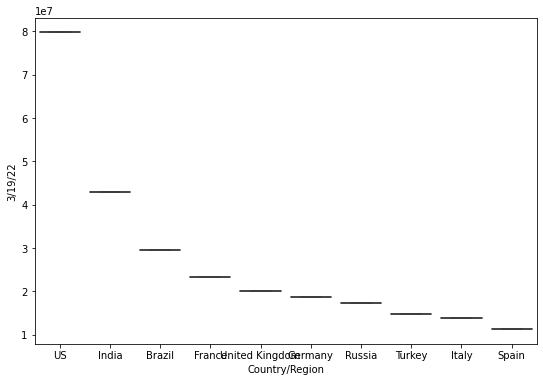

In [12]:
plt.figure(figsize=(9,6))
sns.boxplot(data=last_ten,x='Country/Region',y='3/19/22')

<AxesSubplot:xlabel='Country/Region', ylabel='3/19/22'>

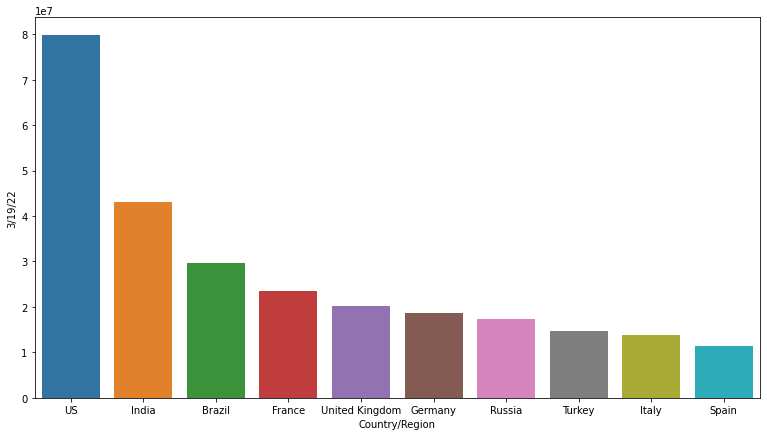

In [16]:
plt.figure(figsize=(13,7))
sns.barplot(data=last_ten,x='Country/Region',y='3/19/22')